# Heart Disease Prediction Project

## Problem Statement

- To Predict if a person is suffering from heart disease or not.


### Attribute Information

**Features**

1. age
2. sex
3. cp : chest pain type (4 values)
4. trestbps : resting blood pressure
5. chol : serum cholestoral in mg/dl
6. fbs : fasting blood sugar > 120 mg/dl
7. restecg : resting electrocardiographic results (values 0,1,2)
8. thalach : maximum heart rate achieved
9. exang : exercise induced angina
10. oldpeak : oldpeak = ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal : 0 = normal; 1 = fixed defect; 2 = reversable defect

**Label**

14. target : 0, 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 15)

In [4]:
# Removing unwanted column
df = df.drop(columns = 'Unnamed: 0')
df.shape

(303, 14)

In [5]:
# checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Distribution

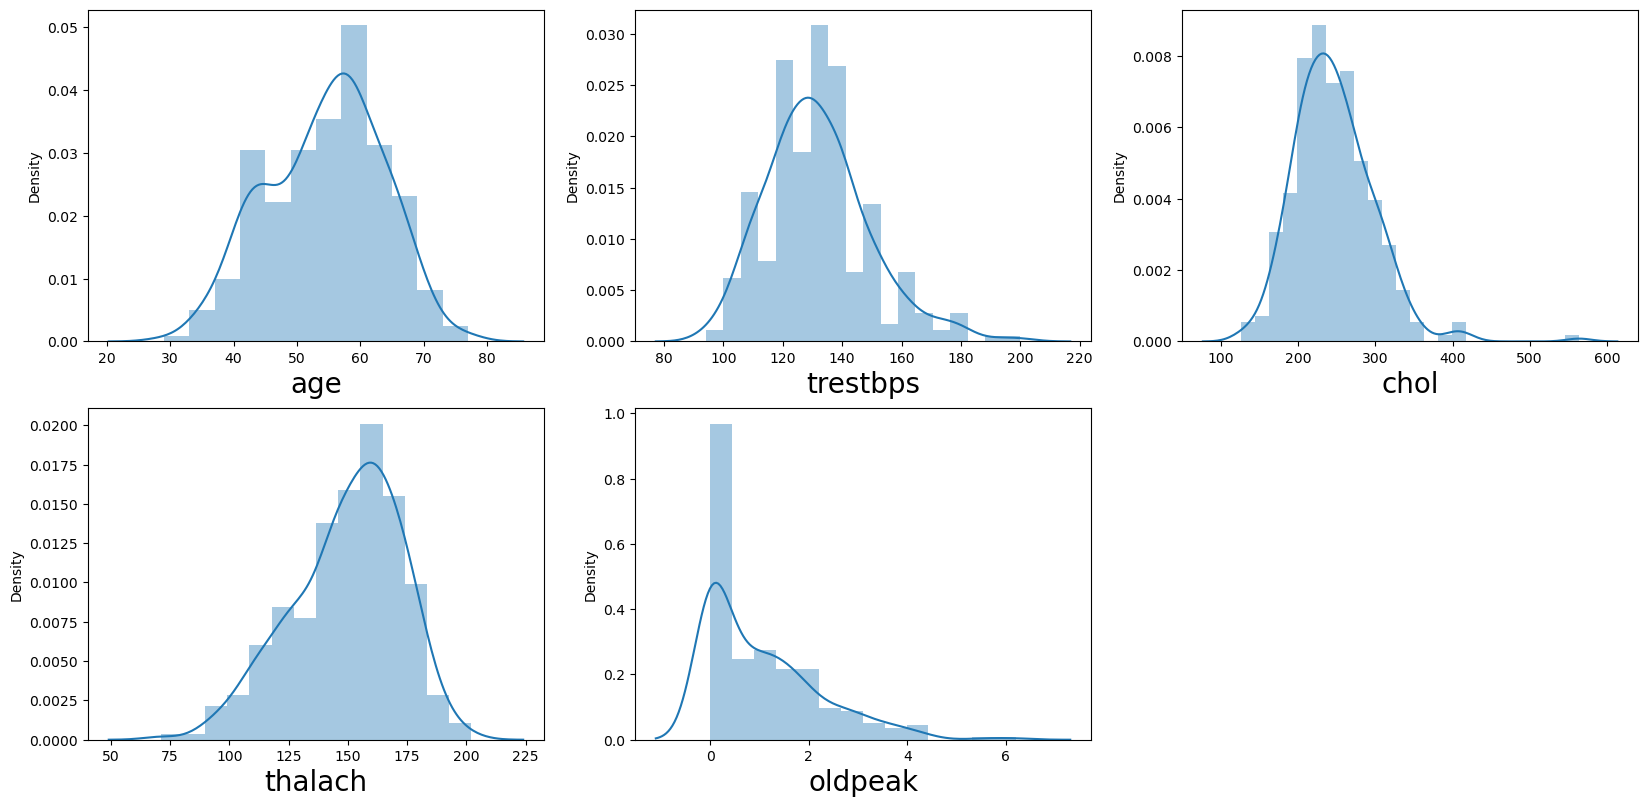

In [8]:
# Checking for distributions in column

plt.figure(figsize = (20,25))
plotnumber = 1

for column in df[['age','trestbps','chol','thalach','oldpeak']]:
    if plotnumber <= 15:
        plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber +=1
plt.show()   

Almost all are normally distributed

In [9]:
# Just find correlation of feature vs target using corrwith
df_cor = df.drop(columns = 'target').corrwith(df.target)
df_cor

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

### Visualize the correlation

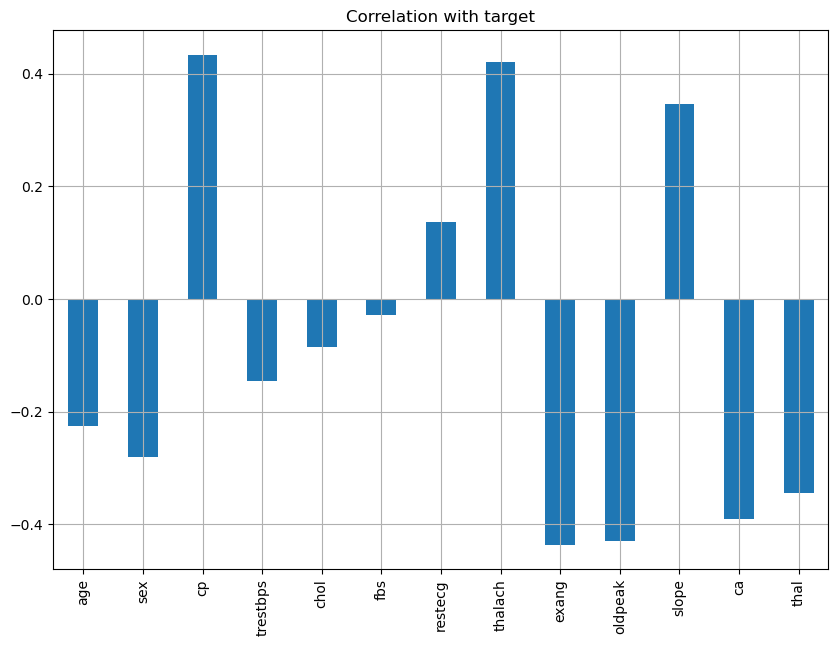

In [10]:
df_cor.plot(kind = 'bar', grid = True, figsize = (10,7), title = 'Correlation with target')
plt.show()

Let's work on feature selection and see if that can help us building better model.

In [11]:
x = df.drop(columns = 'target')
y = df.target

### Model building using SelectPercentile features

In [12]:
from sklearn.feature_selection import SelectPercentile, chi2

In [13]:
# Instantiate SelectPercentile and fit (feature, label)
Spercentile = SelectPercentile(score_func = chi2, percentile = 80)

In [14]:
Spercentile = Spercentile.fit(x,y)

In [15]:
cols = Spercentile.get_support(indices=True)  # to return index numbers instead of boolean
print('Feature Index = ',cols)

features = x.columns[cols]
print('Features = ',list(features))

Feature Index =  [ 0  1  2  3  4  7  8  9 10 11]
Features =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


Let's print the top 80% features

In [16]:
# Create subset of selected featues

x = df[features]

y = df.target

In [17]:
scaler = StandardScaler() 
x = scaler.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [19]:
# Write one function and call as many as times to check accuracy_score of different models

def metric_score(clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        train_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        
        print(f"Accuracy Score: {accuracy_score(y_train,train_pred) * 100:.2f}%")
        
    elif train == False:
        test_pred = clf.predict(x_test)
        
        print('\n===============Test Result================')
        print(f"Accuracy Score: {accuracy_score(y_test,test_pred) * 100: .2f}%")
        
        print('\n \n test Classification report \n', classification_report(y_test, test_pred,digits = 2))

In [20]:
# Initiate GradientBoostingClassifier

gbdt = GradientBoostingClassifier()

# Train the model

gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [21]:
# Call the function and pass dataset to check train and test score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) # This is for training score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # This is for testing score


===============Train Result===============
Accuracy Score: 99.56%

===============Test Result================
Accuracy Score:  80.26%

 
 test Classification report 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.82      0.80      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



Let's try if we can improve the performance of our model using parameter tuning

### Hyperparameter Tuning

In [22]:
grid_param = {'max_depth': range(4,8), 
              'min_samples_leaf': range(2,8,2),
              'learning_rate': np.arange(0.1,0.3)
             }

In [23]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid = grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_leaf': range(2, 8, 2)})

In [24]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 6}

In [25]:
gbdt = GradientBoostingClassifier(max_depth = 2, min_samples_split = 5, learning_rate = 0.1)

gbdt.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=2, min_samples_split=5)

In [26]:
# Call the function and pass dataset to check train and test score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) # This is for training score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # This is for testing score


===============Train Result===============
Accuracy Score: 95.15%

===============Test Result================
Accuracy Score:  82.89%

 
 test Classification report 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.80      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



# Achieved almost 83 % of accuracy score.